In [45]:
import os
import tarfile
from six.moves import urllib
import matplotlib.pyplot as plt

In [46]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
print (HOUSING_URL)

https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz


In [47]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path,"housing.tgz")#junta diretorio de maneira inteligente sem necessidade de indicar \
    urllib.request.urlretrieve(housing_url, tgz_path)#urllib.request.urlopen(url[, data][, timeout])
    housing_tgz = tarfile.open(tgz_path)#tarfile.open(name=None, mode='r', fileobj=None, bufsize=10240, **kwargs)
    housing_tgz.extractall(path=housing_path)#TarFile.extractall(path=".", members=None)
    housing_tgz.close()

In [48]:
fetch_housing_data()

In [49]:
print(HOUSING_PATH)

datasets\housing


In [50]:
import pandas as pd

In [51]:
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [52]:
housing=load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [53]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [54]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [55]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


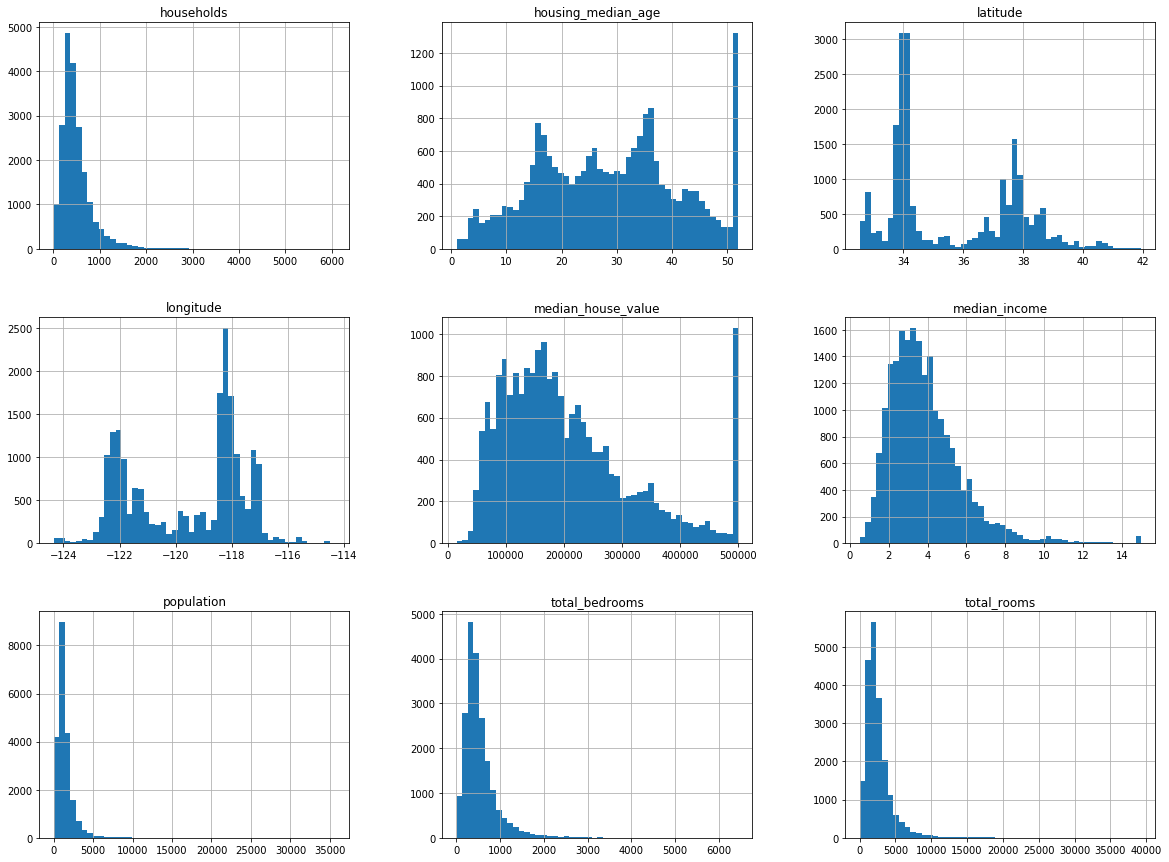

In [63]:
%matplotlib inline 
# set matplotlib as backend plot jupyter
import matplotlib.pyplot as plt 
housing.hist(bins=50, figsize=(20,15))
plt.show()

### 1. Creating a Test Set

In [ ]:
import numpy as np

In [ ]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices] # pandas set position-integer (iloc())

In [ ]:
train_set, test_set = split_train_test(housing,0.2)
print(len(train_set),"train +", len(test_set),"test")

In [ ]:
import hashlib

In [ ]:
def test_set_check (identifier, test_ratio, hash):
    return hash (np.int64(identifier)).digest()[-1]<256*test_ratio

In [ ]:
def split_train_test_by_id(data,test_ratio,id_column,hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash)) # aplicação de uma função anonima(lambda)
    return data.loc[~in_test_set], data.loc[in_test_set] #pandas set position label

### Maneiras de indexar

1. from index column

In [ ]:
housing_with_id = housing.reset_index() # adds an index column
train_set, test_set = split_train_test_by_id (housing_with_id,0.2,"index")

2. from defining variable never change

In [ ]:
housing_with_id["id"] = housing["longitude"]*1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id,0.2,"id")

3. from sklearn model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)

### Seleções estratificadas - manter a proporção de uma categoria para evitar biases

In [ ]:
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"]<5,5.0,inplace=True)

### Produzindo aleatorios estratificados com sklearn

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state = 42)
for train_index, test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_train_test = housing.loc[test_index]

###### Checando se funcionou

In [ ]:
housing["income_cat"].value_counts()/len(housing)

In [ ]:
strat_train_test["income_cat"].value_counts()/len(housing)

#### Removendo o campo income cat

In [ ]:
for set_ in (strat_train_set, strat_train_test):
    set_.drop("income_cat", axis=1, inplace=True)

In [ ]:
housing = strat_train_set.copy()

In [60]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


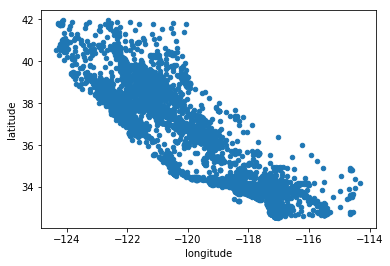

(<matplotlib.axes._subplots.AxesSubplot at 0x1796b3f5ef0>, None)

In [61]:
housing.plot(kind="scatter", x="longitude", y="latitude"),plt.show()

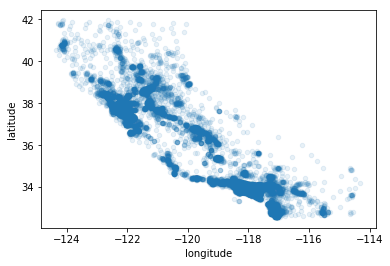

(<matplotlib.axes._subplots.AxesSubplot at 0x1796b47d550>, None)

In [62]:
housing.plot(kind="scatter", x="longitude", y="latitude",alpha=0.1),plt.show()

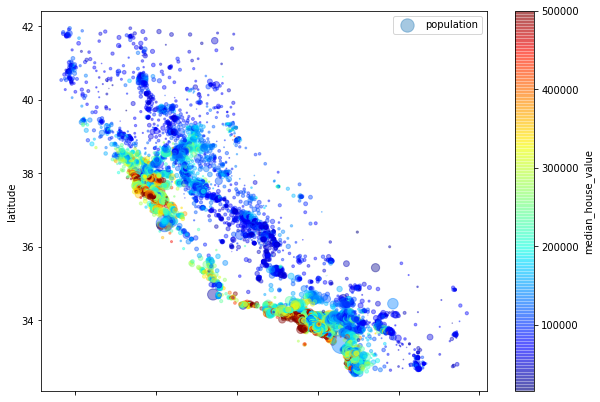

(<matplotlib.axes._subplots.AxesSubplot at 0x1796c9b1668>, None)

In [64]:
# housing is a object pandas class
housing.plot(kind="scatter", x="longitude", y="latitude",alpha=0.4,s=housing["population"]/100, label ="population",
            figsize =(10,7),c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True),plt.show()

#### Looking for correlations

In [65]:
corr_matrix = housing.corr()

In [66]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [72]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001796CA06A58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001796F869C88>]], dtype=object)

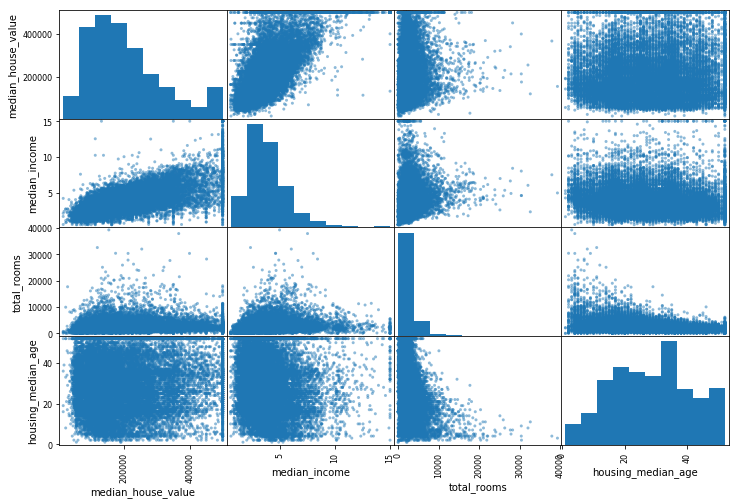

In [73]:
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))

### Zoom in median house value x median income

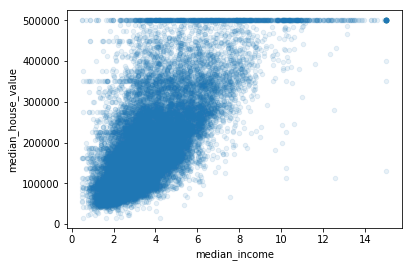

(<matplotlib.axes._subplots.AxesSubplot at 0x1796f9662b0>, None)

In [74]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1),plt.show()

In [75]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["ppopulation_per_household"]=housing["population"]/housing["households"]

In [76]:
corr_matrix = housing.corr()

In [78]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.688075
rooms_per_household          0.151948
total_rooms                  0.134153
housing_median_age           0.105623
households                   0.065843
total_bedrooms               0.049686
ppopulation_per_household   -0.023737
population                  -0.024650
longitude                   -0.045967
latitude                    -0.144160
bedrooms_per_room           -0.255880
Name: median_house_value, dtype: float64

### Prepare the data for machine learning algorithms